In [15]:
import spacy
import nltk
import gensim
from gensim import corpora
from spacy.lang.en import English
from nltk.corpus import wordnet as wn
import time
from nltk.stem.wordnet import WordNetLemmatizer
from contextlib import contextmanager
import random
import numpy as np
import csv
import pandas as pd
import json

In [2]:
@contextmanager
def timer(msg):
    t0 = time.time()
    print(f'[{msg}] start.')
    yield
    elapsed_time = time.time() - t0
    print(f'[{msg}] done in {elapsed_time / 60:.2f} min.')

In [3]:
data = pd.read_csv('cleaned_short.csv')

In [4]:
data.head()

,id,target,comment_text,severe_toxicity,obscene,identity_attack,insult,threat,asian,atheist,...,rating,funny,wow,sad,likes,disagree,sexual_explicit,identity_annotator_count,toxicity_annotator_count,y
0,239579,0.4400,this is a great story man i wonder i...,0.00,0.293333,0.0000,0.3200,0.0000,0.0,0.0,...,approved,0,0,0,1,0,0.04,10,75,0
1,239607,0.9125,yet call out all muslims for the acts of a few...,0.05,0.237500,0.6125,0.8875,0.1125,0.0,0.0,...,approved,0,0,0,1,0,0.00,4,80,1
2,239644,0.0000,because the people who drive cars more are the...,0.00,0.000000,0.0000,0.0000,0.0000,0.0,0.0,...,approved,0,0,0,0,0,0.00,4,4,0
3,239653,0.3000,mormons have had a complicated relationship wi...,0.00,0.000000,0.3000,0.0000,0.0000,0.0,0.0,...,approved,0,0,0,2,0,0.00,10,10,0
4,239744,0.0000,i am doing the same thing,0.00,0.000000,0.0000,0.0000,0.0000,0.0,0.0,...,approved,0,0,0,1,0,0.00,4,4,0


In [5]:
with open('preprocess_trigram_token.csv','r') as infile:
    text_data = json.load(infile)

In [6]:
text_data

[['great',
  'story',
  'man',
  'wonder',
  'person',
  'yell',
  'shut',
  'fuck',
  'ever_heard'],
 ['yet',
  'call',
  'muslim',
  'acts',
  'get',
  'pillory',
  'okay',
  'smear',
  'entire',
  'religion',
  'idiot',
  'okay',
  'bash',
  'christian_sects'],
 ['people',
  'drive_cars',
  'one',
  'cause',
  'wear',
  'tear',
  'roads',
  'pretty',
  'fair',
  'straightforward'],
 ['mormons', 'complicate', 'relationship', 'federal_law'],
 ['thing'],
 ['creativity', 'classroom', 'hard', 'stay', 'way', 'please', 'agree'],
 ['good',
  'question',
  'jackie',
  'yokel',
  'make',
  'money',
  'well',
  'lavoy',
  'finicum',
  'foster',
  'child',
  'take',
  'ranch',
  'likely',
  'result',
  'become',
  'militant',
  'criminal',
  'likely',
  'face',
  'suite',
  'federal',
  'felony_charges',
  'report',
  'tax_filings',
  'home',
  'state',
  'suggest',
  'finicum',
  'receive',
  'years',
  'catholic_charities',
  'provide',
  'foster_care',
  'accord',
  'statement',
  'medium',


In [8]:
dictionary = corpora.Dictionary(text_data)
corpus = [dictionary.doc2bow(text) for text in text_data]

In [27]:
pd.Series(dictionary.values()).to_dense()

/Users/kelvin/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:1: FutureWarning: DataFrame/Series.to_dense is deprecated and will be removed in a future version
  """Entry point for launching an IPython kernel.


0         (ever_heard, fuck, great, man, person, shut, s...
1         (ever_heard, fuck, great, man, person, shut, s...
2         (ever_heard, fuck, great, man, person, shut, s...
3         (ever_heard, fuck, great, man, person, shut, s...
4         (ever_heard, fuck, great, man, person, shut, s...
                                ...                        
102025    (ever_heard, fuck, great, man, person, shut, s...
102026    (ever_heard, fuck, great, man, person, shut, s...
102027    (ever_heard, fuck, great, man, person, shut, s...
102028    (ever_heard, fuck, great, man, person, shut, s...
102029    (ever_heard, fuck, great, man, person, shut, s...
Length: 102030, dtype: object

In [13]:
with timer('LDA'):
    NUM_TOPICS = 50
    ldamodel = gensim.models.ldamodel.LdaModel(corpus, num_topics = NUM_TOPICS, id2word=dictionary, passes=10, random_state=0)
#     ldamodel.save('model5.gensim')
    topics = ldamodel.print_topics()

[LDA] start.


NameError: name 'ldamodexl' is not defined

In [14]:
topics = ldamodel.print_topics()
topics

[(47,
  '0.073*"sex" + 0.066*"truth" + 0.043*"true" + 0.035*"practice" + 0.034*"quote" + 0.025*"identify" + 0.022*"humans" + 0.021*"nature" + 0.019*"false" + 0.019*"asian"'),
 (22,
  '0.144*"call" + 0.062*"name" + 0.051*"prove" + 0.036*"calling" + 0.033*"china" + 0.026*"none" + 0.025*"immigrant" + 0.024*"excuse" + 0.024*"hands" + 0.023*"evil"'),
 (17,
  '0.022*"people" + 0.021*"one" + 0.012*"make" + 0.012*"would" + 0.011*"many" + 0.010*"right" + 0.010*"say" + 0.010*"also" + 0.010*"think" + 0.010*"may"'),
 (12,
  '0.085*"christian" + 0.083*"muslim" + 0.067*"religion" + 0.034*"forget" + 0.030*"islam" + 0.026*"jew" + 0.025*"white_supremacist" + 0.025*"chinese" + 0.022*"nazi" + 0.021*"russia"'),
 (9,
  '0.153*"trump" + 0.057*"liberal" + 0.056*"vote" + 0.040*"conservative" + 0.038*"republican" + 0.035*"democrat" + 0.028*"party" + 0.027*"support" + 0.021*"election" + 0.020*"hillary"'),
 (21,
  '0.216*"god" + 0.127*"love" + 0.031*"bible" + 0.026*"dead" + 0.017*"soul" + 0.016*"self" + 0.015*"e

In [15]:
with timer('corpus'):
    lda_corpus = ldamodel[corpus]
    lda_corpus

[corpus] start.
[corpus] done in 0.00 min.


In [16]:
with timer('lda_docs'):
    lda_docs = [doc for doc in lda_corpus]

[lda_docs] start.
[lda_docs] done in 1.44 min.


In [17]:
import pyLDAvis
import pyLDAvis.gensim
pyLDAvis.enable_notebook()

In [18]:
pyLDAvis.gensim.prepare(ldamodel, corpus, dictionary, sort_topics=False)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/pyLDAvis/_prepare.py:257: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  return pd.concat([default_term_info] + list(topic_dfs))


PreparedData(topic_coordinates=              x         y  topics  cluster       Freq
topic                                                
0      0.087304  0.013592       1        1   0.967765
1     -0.203940 -0.087845       2        1   3.298086
2      0.070784 -0.010815       3        1   1.291955
3      0.064785  0.100810       4        1   1.457121
4     -0.010005 -0.126241       5        1   1.631867
5      0.060008 -0.041639       6        1   1.372319
6     -0.357602 -0.004748       7        1   7.214638
7     -0.327693  0.066672       8        1   5.423913
8     -0.326310 -0.032313       9        1   5.661808
9     -0.166630 -0.013286      10        1   2.764948
10     0.087656  0.000050      11        1   1.099141
11    -0.146572 -0.008483      12        1   2.716434
12    -0.023914 -0.195826      13        1   1.808748
13    -0.019043  0.162897      14        1   1.870299
14    -0.216363  0.091564      15        1   3.530585
15     0.085693  0.001982      16        1   1.113541
16     0.054278  0.138531      17        1   1.538008
17    -0.353058  0.011750      18        1  10.757593
18    -0.005684  0.167636      19        1   1.676679
19     0.061944  0.010263      20        1   1.029234
20     0.044897  0.019389      21        1   1.436247
21     0.058393  0.059492      22        1   1.395580
22     0.069589 -0.000641      23        1   1.277001
23     0.086920  0.013524      24        1   1.013829
24     0.057615  0.006697      25        1   1.228189
25    -0.339826 -0.017156      26        1   6.372276
26     0.066913 -0.029496      27        1   1.135717
27     0.092619  0.007098      28        1   1.074337
28     0.055525  0.109153      29        1   1.410362
29     0.070477 -0.005307      30        1   1.199308
30     0.062187  0.051500      31        1   1.386640
31     0.088462 -0.005229      32        1   1.024557
32     0.071133 -0.097370      33        1   1.154564
33     0.080478 -0.009922      34        1   1.158242
34     0.084645  0.003751      35        1   1.050080
35     0.081789  0.017089      36        1   1.086200
36     0.085453 -0.007916      37        1   1.073573
37     0.072424 -0.014618      38        1   1.107613
38     0.063567  0.008160      39        1   1.352403
39     0.084214  0.022254      40        1   1.117638
40    -0.009208 -0.199960      41        1   1.517908
41     0.048741 -0.012127      42        1   1.199294
42     0.094687 -0.022044      43        1   0.891446
43    -0.005959 -0.076097      44        1   1.963253
44    -0.010451  0.113601      45        1   1.980050
45     0.077669 -0.042961      46        1   1.109869
46     0.092528 -0.020274      47        1   0.933801
47     0.075624 -0.088036      48        1   1.187626
48     0.091519  0.009685      49        1   0.963988
49     0.091740 -0.036787      50        1   0.973729, topic_info=     Category          Freq           Term         Total  loglift  logprob
232   Default  42988.000000          woman  42988.000000  30.0000  30.0000
3909  Default  25752.000000          trump  25752.000000  29.0000  29.0000
357   Default  27767.000000          right  27767.000000  28.0000  28.0000
129   Default  58007.000000          would  58007.000000  27.0000  27.0000
118   Default  18323.000000            god  18323.000000  26.0000  26.0000
...       ...           ...            ...           ...      ...      ...
1531  Topic50    393.719513      hilarious    394.951630   4.6287  -5.0117
3964  Topic50    381.546143      executive    382.778259   4.6286  -5.0431
2852  Topic50    354.040558  irresponsible    355.272675   4.6283  -5.1180
4306  Topic50    631.285217       contrary    857.288147   4.3258  -4.5396
2534  Topic50    621.109253   organization   1592.900635   3.6900  -4.5559

[2071 rows x 6 columns], token_table=      Topic      Freq         Term
term                              
4401     35  0.998780      abandon
4318     40  0.999754     abortion
5451     33  0.999197   absolutely
9617     15  0.997402       absurd
1

In [19]:
import numpy as np
matrix = pd.DataFrame(np.zeros((235087,50)))

In [20]:
for idx, doc in enumerate(lda_docs):
    for doc_tuple in doc:
        col_num = doc_tuple[0]
        score = doc_tuple[1]
        matrix.loc[idx, col_num] = score

In [21]:
data['y'] = np.where(data.target > 0.5, 1, 0)
data.y.value_counts(normalize=True)%100

0    0.925959
1    0.074041
Name: y, dtype: float64

In [38]:
lda_data = pd.concat([data.y, data.comment_text, matrix], axis=1)

In [40]:
lda_data.to_csv('doc_topic50.csv', index=False)

In [41]:
lda_data = pd.read_csv('doc_topic50.csv')

In [42]:
lda_data = lda_data.set_index('comment_text')

In [24]:
x = lda_data.iloc[:,1:]
y = lda_data.iloc[:, 0]

In [25]:
from imblearn.over_sampling import SMOTE, ADASYN, RandomOverSampler
from xgboost import XGBClassifier
from sklearn.metrics import roc_auc_score, roc_curve
from matplotlib import pyplot
from xgboost import plot_importance
from sklearn.metrics import roc_curve, auc
# Create a function to calculate the error metrics, since we'll be doing this several times
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

In [26]:
# Create a logistic regression model to use
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()

In [27]:
from sklearn.model_selection import train_test_split
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.25, random_state=42, stratify=y)
x_balance, y_balance = RandomOverSampler().fit_sample(x_train, y_train)
x_balance = pd.DataFrame(x_balance, columns=x_train.columns)

In [28]:
lr.fit(x_balance, y_balance)
y_pred = lr.predict(x_test)

/home/ubuntu/anaconda3/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


In [29]:
def conf_matrix(actual, predicted):
    cm = confusion_matrix(actual, predicted)
    ax = sns.heatmap(cm, xticklabels=['predicted_negative', 'predicted_positive'], 
                yticklabels=['actual_negative', 'actual_positive'], annot=True,
                fmt='d', annot_kws={'fontsize':20}, cmap="YlGnBu");
    
    true_neg, false_pos = cm[0]
    false_neg, true_pos = cm[1]
    bottom, top = ax.get_ylim()
    ax.set_ylim(bottom + 0.5, top - 0.5)
        
    accuracy = round((true_pos + true_neg) / (true_pos + true_neg + false_pos + false_neg),3)
    precision = round((true_pos) / (true_pos + false_pos),3)
    recall = round((true_pos) / (true_pos + false_neg),3)
    f1 = round(2 * (precision * recall) / (precision + recall),3)

    cm_results = [accuracy, precision, recall, f1]
    return cm_results

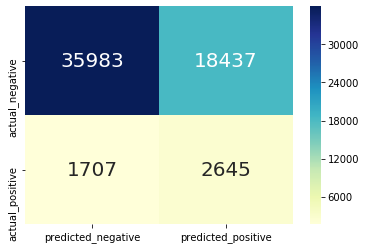

In [30]:
# The heat map for the first logistic regression model
cm1 = conf_matrix(y_test, y_pred)

In [31]:
# Compile all of the error metrics into a dataframe for comparison
results = pd.DataFrame(list(zip(cm1)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LogReg_TFIDF']
results

,LogReg_TFIDF
Accuracy,0.657
Precision,0.125
Recall,0.608
F1 Score,0.207


,LogReg_TFIDF,NB_TFIDF
Accuracy,0.657,0.504
Precision,0.125,0.099
Recall,0.608,0.700
F1 Score,0.207,0.173


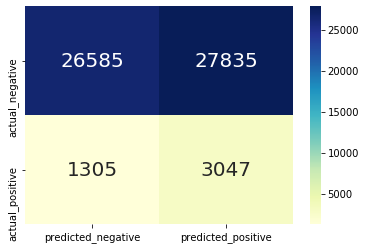

In [32]:
# Fit the second Naive Bayes model
from sklearn.naive_bayes import BernoulliNB
bnb = BernoulliNB()
bnb.fit(x_balance, y_balance)
y_pred_nb = bnb.predict(x_test)

# Here's the heat map for the first Naive Bayes model
cm2 = conf_matrix(y_test, y_pred_nb)

# Compile all of the error metrics into a dataframe for comparison
results = pd.DataFrame(list(zip(cm1, cm2)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LogReg_TFIDF', 'NB_TFIDF']
results

[timer] start.


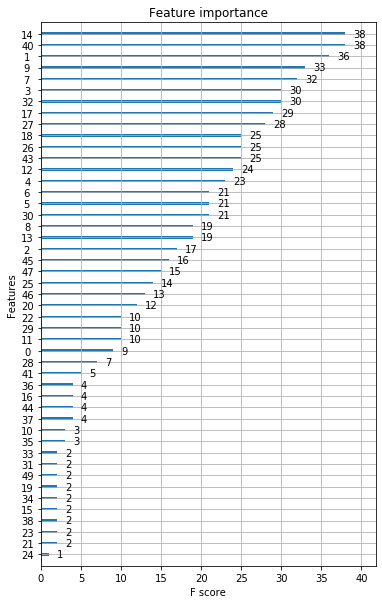

ROC_AUC:  0.6390949613031541
[[36647 17773]
 [ 1720  2632]]
[timer] done in 0.76 min.


In [34]:
with timer('timer'):
    model = XGBClassifier()
    model.fit(x_balance, y_balance)
    # plot feature importance
    ax = plot_importance(model)
    fig = ax.figure
    fig.set_size_inches(6, 10)
    pyplot.show()
    predict = model.predict(x_test)
    false_positive_rate, true_positive_rate, thresholds = roc_curve(y_test, predict)
    roc_auc = auc(false_positive_rate, true_positive_rate)
    print("ROC_AUC: ", roc_auc)
    print(confusion_matrix(y_test, predict))

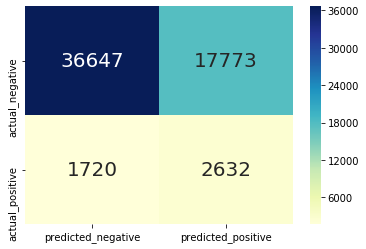

In [35]:
cm3 = conf_matrix(y_test, predict)

In [36]:
results = pd.DataFrame(list(zip(cm1, cm2, cm3)))
results = results.set_index([['Accuracy', 'Precision', 'Recall', 'F1 Score']])
results.columns = ['LogReg_CountVec', 'NB_CountVec', 'XBG_CountVec']
results

,LogReg_CountVec,NB_CountVec,XBG_CountVec
Accuracy,0.657,0.504,0.668
Precision,0.125,0.099,0.129
Recall,0.608,0.700,0.605
F1 Score,0.207,0.173,0.213
